<a href="https://colab.research.google.com/github/Stronglight0627/PilGi/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28,28,1) / 255.0 #-1 = 남은 배열의 길이와 남은 차원으로부터 알아서 행을 지정해준다.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

#첫번째합성곱층
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

#두번째합성곱층
model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_14 (Dense)            (None, 100)              

In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

#첫번째합성곱층
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

#두번째합성곱층
model.add(keras.layers.Conv2D(32,kernel_size=(5,5), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1568)              0         
                                                                 
 dense_16 (Dense)            (None, 100)              

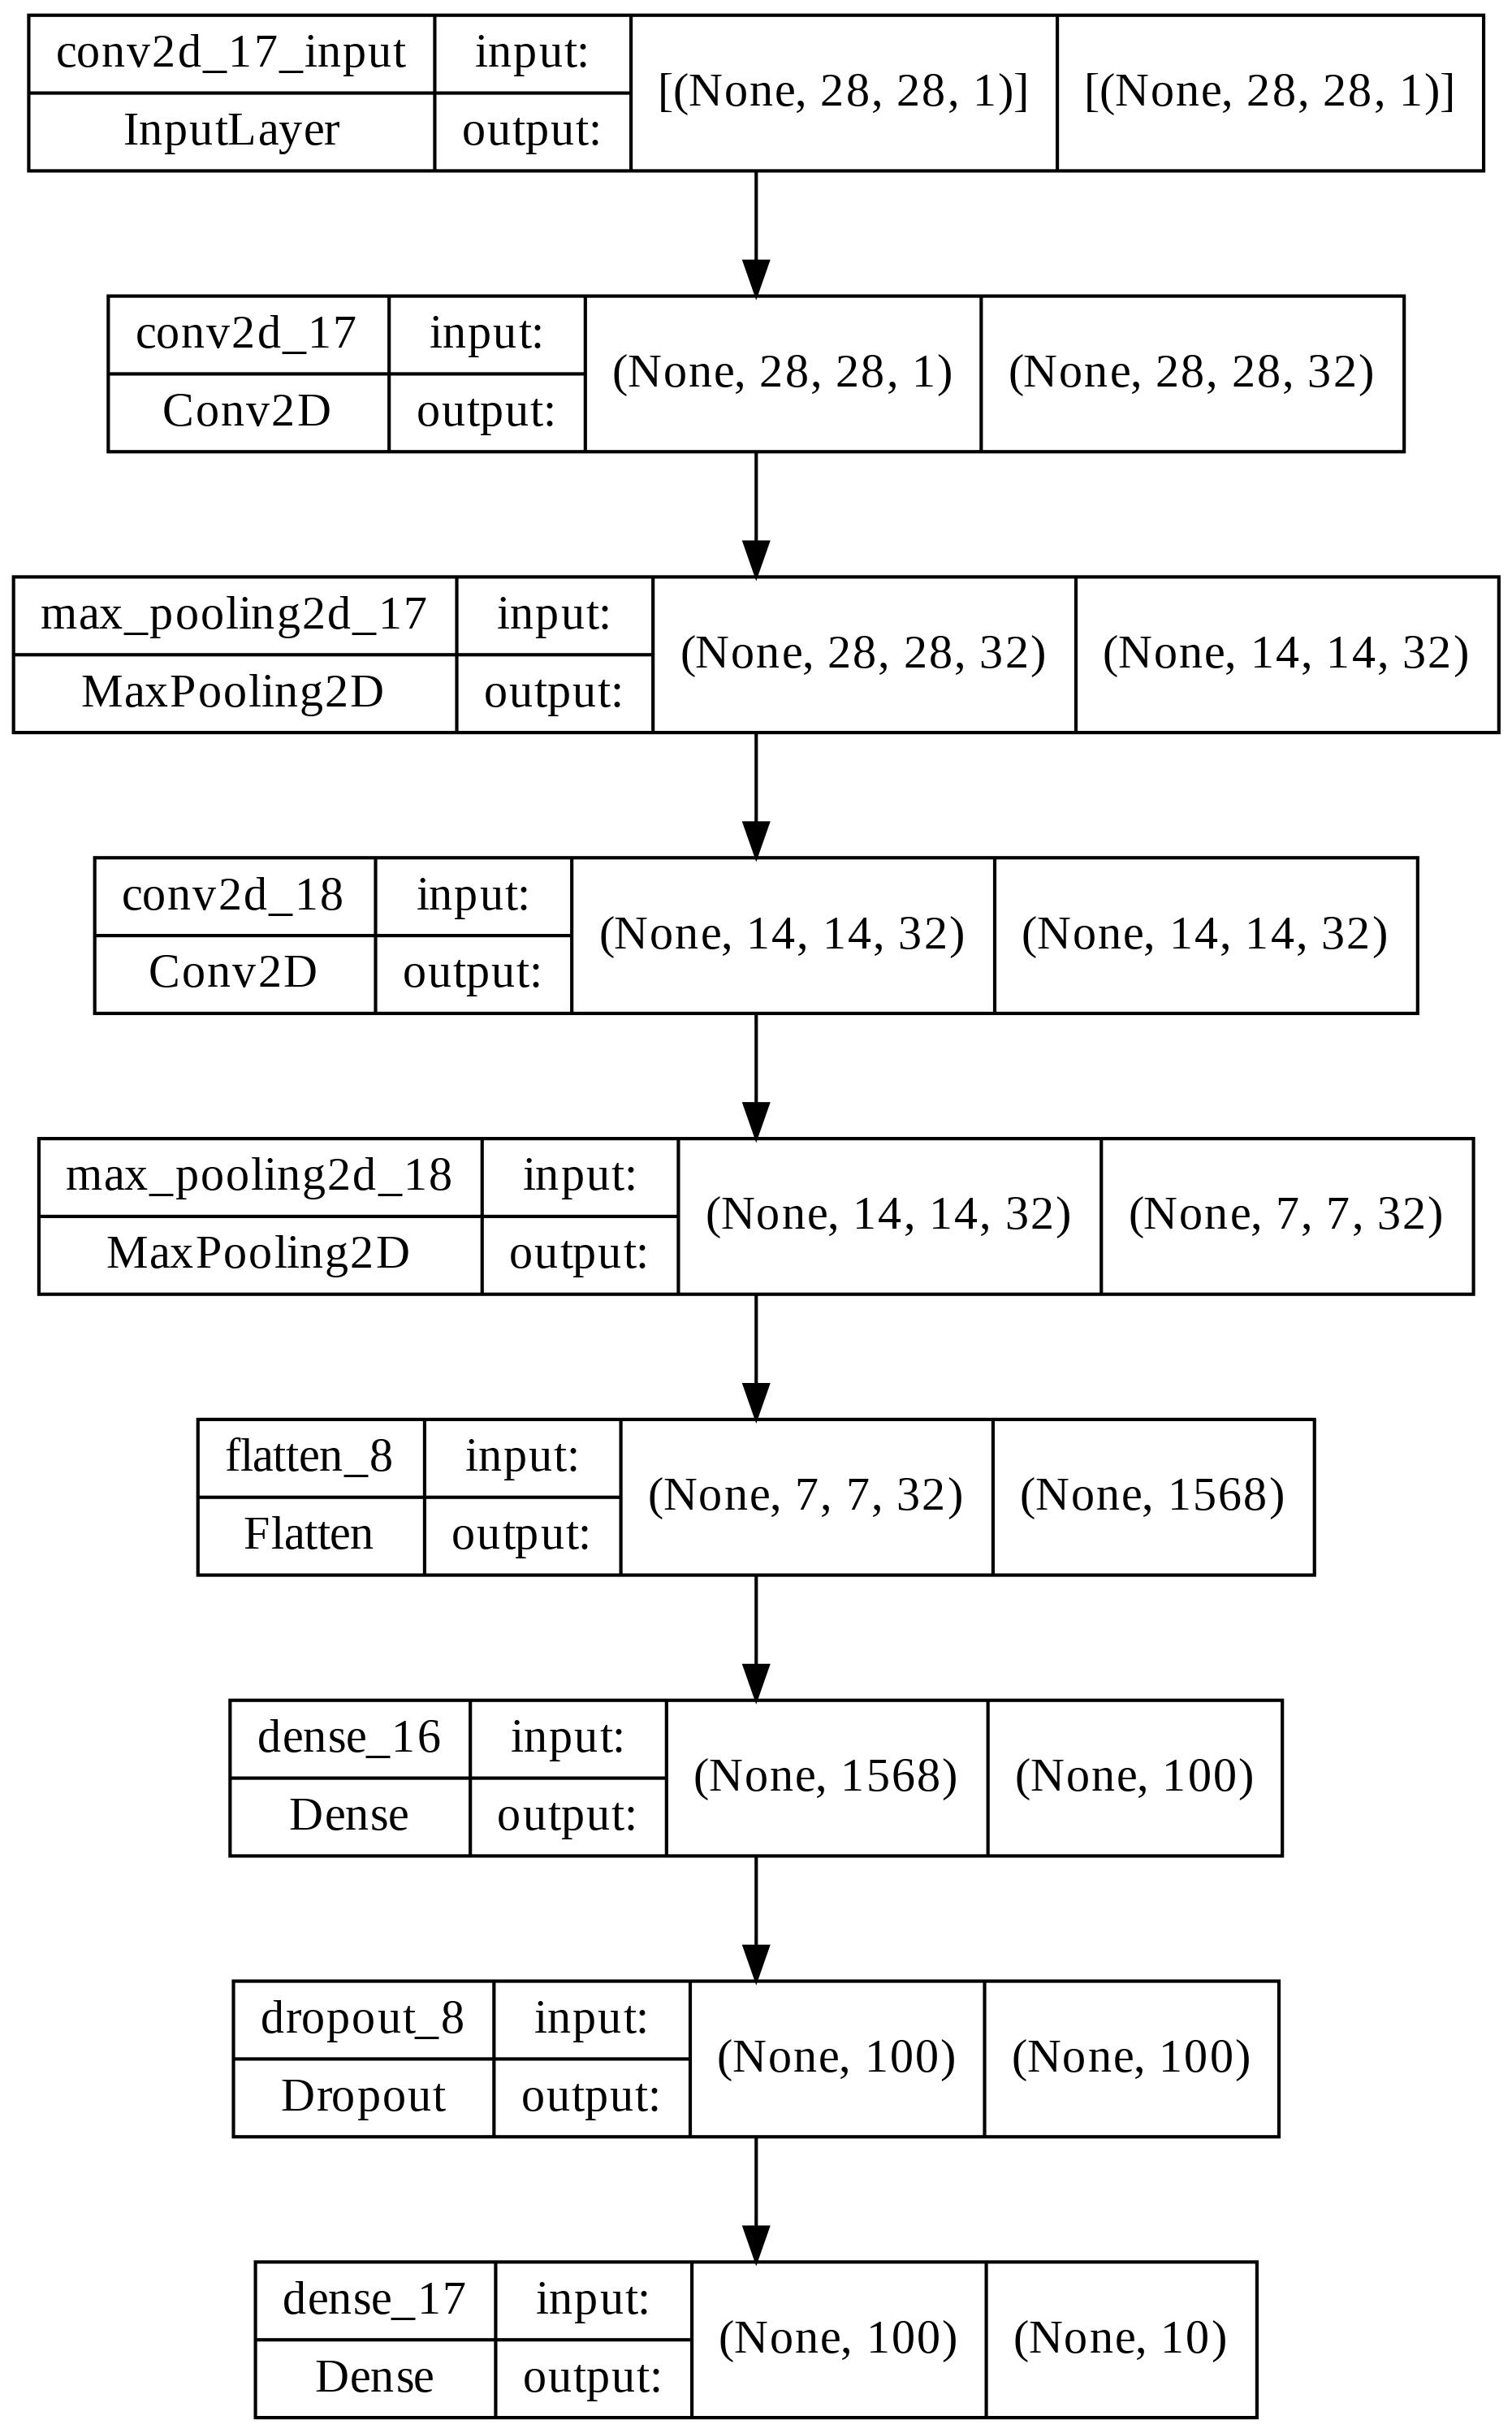

In [13]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history=model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 114s 75ms/step - loss: 0.5488 - accuracy: 0.8052 - val_loss: 0.3380 - val_accuracy: 0.8774
Epoch 2/20
1500/1500 [==============================] - 90s 60ms/step - loss: 0.3522 - accuracy: 0.8731 - val_loss: 0.2979 - val_accuracy: 0.8878
Epoch 3/20
1500/1500 [==============================] - 81s 54ms/step - loss: 0.2993 - accuracy: 0.8922 - val_loss: 0.2685 - val_accuracy: 0.9010
Epoch 4/20
1500/1500 [==============================] - 82s 54ms/step - loss: 0.2684 - accuracy: 0.9030 - val_loss: 0.2531 - val_accuracy: 0.9047
Epoch 5/20
1500/1500 [==============================] - 81s 54ms/step - loss: 0.2456 - accuracy: 0.9105 - val_loss: 0.2418 - val_accuracy: 0.9108
Epoch 6/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2279 - accuracy: 0.9163 - val_loss: 0.2316 - val_accuracy: 0.9143
Epoch 7/20
1500/1500 [==============================] - 81s 54ms/step - loss: 0.2082 - accuracy: 0.9246 - val_loss: 0.2412 

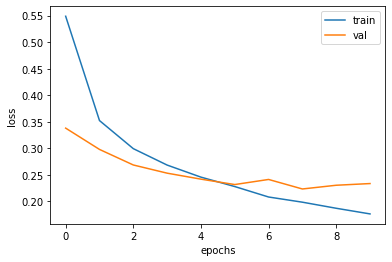

375/375 [==============================] - 5s 13ms/step - loss: 0.2233 - accuracy: 0.9195


[0.22331365942955017, 0.9194999933242798]

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
model.evaluate(val_scaled, val_target)

In [16]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 14ms/step - loss: 0.2379 - accuracy: 0.9155


[0.23786193132400513, 0.9154999852180481]